In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["MAT","LinearAlgebra","Plots","Clustering","StatsPlots","Distributions","PDMats","Distances"])

    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using MAT, LinearAlgebra, Plots, Clustering, StatsPlots, Distributions, PDMats, Distances

In [10]:
n1 = 150
n2 = 50

dn1 = Normal(0, 1)
# ellipse centered at (0,0)
x = rand(dn1, n1 + n2)
y = 0.5 * rand(dn1, n1+n2)

# ellipse centered at (1,-2) and rotated by theta
theta = π/4
A = [ cos(theta) -sin(theta); sin(theta) cos(theta)]
x2 = rand(dn1, n1+n2) .+ 1
y2 = 0.2 * rand(dn1, n1+n2) .- 2

x3 = A[1,1]*x2 .+ A[1,2]*y2
y3 = A[2,1]*x2 .+ A[2,2]*y2


200-element Vector{Float64}:
  0.2846723929061987
 -1.0753185934320526
  0.22320651714597184
 -1.156920237440595
  0.23226462054581876
 -1.1601056044671976
 -1.0598442420887335
 -0.1688147884088862
 -1.287905730913923
  0.17467613878492916
 -1.3815774586849148
 -1.213631965148534
 -0.46714798800686996
  ⋮
 -1.3002630930446728
 -2.277879119434224
 -0.30323624090109824
 -0.19698543912220545
  0.14558542493606597
 -0.515485414340584
 -0.5212012822571533
 -0.359654913640127
 -1.612821801394361
 -1.1231907139159691
 -0.6813155384171827
 -0.05861685083930457

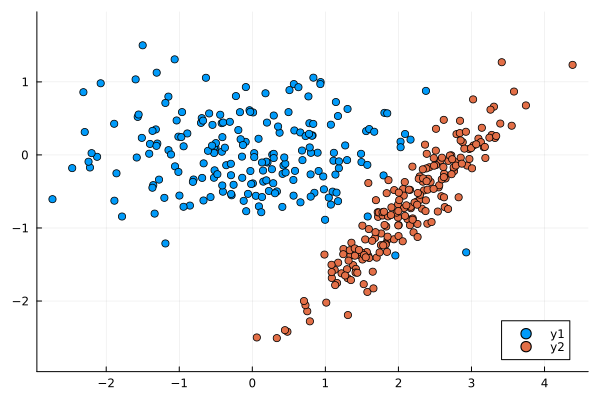

In [11]:
scatter(x,y, aspect_ratio = :equal)
scatter!(x3,y3)

In [30]:
xx = hcat(x,y)
x_tr = xx[1:150,:]
x_te = xx[151:end,:]

50×2 Matrix{Float64}:
 -0.813298   -0.368964
  0.729288    0.258087
 -1.11302     0.00576141
 -0.137979   -0.31307
  1.04682    -0.583968
  0.352828    0.389146
  0.122468   -0.784276
  0.971021   -0.295062
  2.09094     0.286818
 -0.141305   -0.0231183
  0.508822    0.887192
  0.0851916   0.221394
  0.768201    0.800977
  ⋮          
 -0.551107    0.127405
  0.310248   -0.52444
  0.437395   -0.0344996
  1.66867     0.317451
  0.455812   -0.240081
 -0.118147   -0.628375
 -0.375476    0.0993315
 -0.0150602  -0.398602
 -1.41116     0.0164385
  0.799193   -0.571107
  1.57968    -0.842729
 -0.411158   -0.417843

In [31]:
xx2 = hcat(x3,y3)
x2_tr = xx2[1:150,:]
x2_te = xx2[151:end,:]

50×2 Matrix{Float64}:
 2.26058   -0.944528
 3.12871    0.175205
 2.99465    0.0934922
 2.62404   -0.580057
 2.22137   -0.651564
 1.64847   -1.59854
 2.39948   -0.475759
 2.00337   -0.960202
 1.65803   -1.82682
 2.92377    0.317083
 2.3754    -0.621346
 3.30753    0.660665
 1.80204   -0.777653
 ⋮         
 1.45927   -1.30026
 0.788011  -2.27788
 2.6221    -0.303236
 2.33386   -0.196985
 3.06497    0.145585
 2.00499   -0.515485
 2.26546   -0.521201
 2.38527   -0.359655
 1.4377    -1.61282
 2.26238   -1.12319
 2.25654   -0.681316
 2.73617   -0.0586169

In [28]:
x_training = vcat(x_tr,x2_tr)
x_test = vcat(x_te,x2_te)

200×2 Matrix{Float64}:
  1.95813    -1.37609
 -0.409643    0.243533
 -0.0836634  -0.770377
 -1.36606     0.329413
  0.411176   -0.711535
 -0.590826    0.567884
 -0.572133   -0.576916
  0.785889    0.102926
  1.17374    -0.632644
 -2.12467    -0.0257981
 -1.14719     0.0655381
 -1.3089      1.12593
 -0.940303    0.117893
  ⋮          
  1.45927    -1.30026
  0.788011   -2.27788
  2.6221     -0.303236
  2.33386    -0.196985
  3.06497     0.145585
  2.00499    -0.515485
  2.26546    -0.521201
  2.38527    -0.359655
  1.4377     -1.61282
  2.26238    -1.12319
  2.25654    -0.681316
  2.73617    -0.0586169

In [32]:
result = kmeans(x_training', 2)
result.assignments

200-element Vector{Int64}:
 1
 1
 1
 1
 2
 1
 1
 2
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

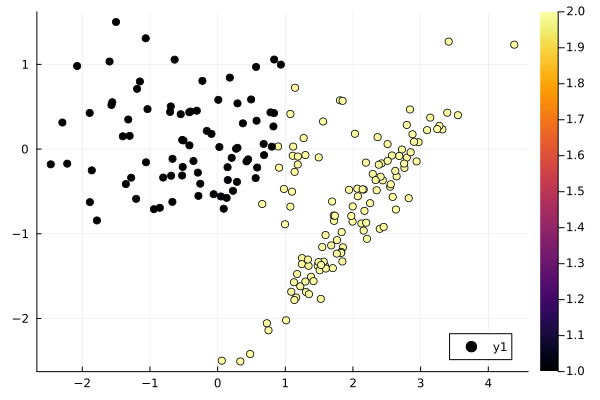

In [33]:
scatter(x_training[:,1], x_training[:,2], zcolor=result.assignments)

In [34]:
c = result.centers

2×2 Matrix{Float64}:
 -0.453196   1.92318
  0.111906  -0.644096

In [35]:
c1 = c[:,1]
c2 = c[:,2]

2-element Vector{Float64}:
  1.9231761925565787
 -0.64409570554052

In [41]:
midx = (c[1,1]+c[1,2])/2
midy = (c[2,1]+c[2,2])/2
slope = (c[2,2]-c[2,1])/(c[1,2]-c[1,1])
b = midy+1/slope*midx
xsep = 0:0.1:2
ysep = -1/slope .* xsep .+b

-2.5764190521060355:0.314334172744609:3.7102644027861444

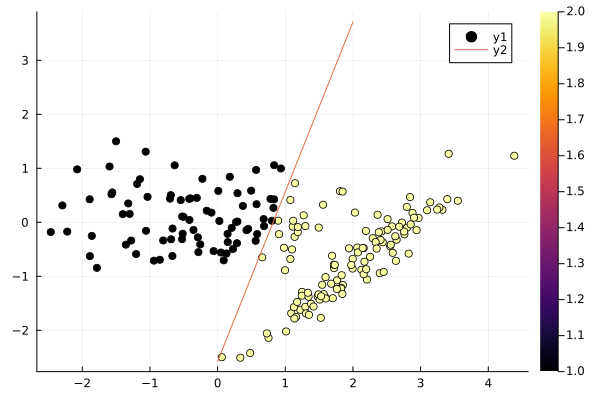

In [42]:
scatter(x_training[:,1], x_training[:,2], zcolor=result.assignments)
plot!(xsep,ysep)

In [36]:
test_assignment = []
for point in eachrow(x_test)
    d1 = sum((point .- c1).^2)
    d2 = sum((point .- c2).^2)
    if d1>=d2
        push!(test_assignment,1)
    else
        push!(test_assignment,2)
    end
end

In [37]:
test_assignment

200-element Vector{Any}:
 1
 2
 2
 2
 2
 2
 2
 2
 1
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

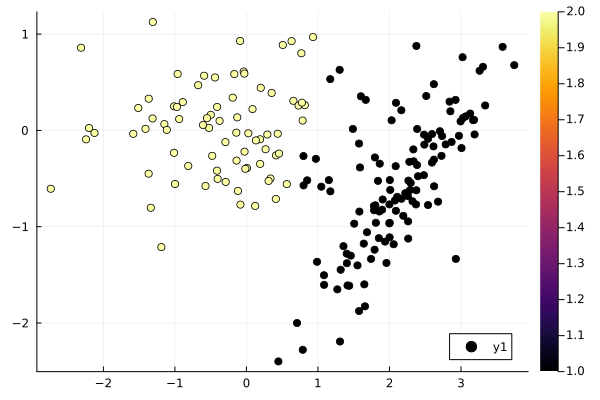

In [38]:
scatter(x_test[:,1], x_test[:,2], zcolor=test_assignment)

In [44]:
D = pairwise(Euclidean(), x_training', x_training', dims=2)

200×200 Matrix{Float64}:
 0.0       2.19357   2.51786   0.899205  …  4.47291   3.7321    3.50075
 2.19357   0.0       0.374539  1.30295      2.27951   1.59191   1.71479
 2.51786   0.374539  0.0       1.64264      1.96947   1.39236   1.72702
 0.899205  1.30295   1.64264   0.0          3.58116   2.83368   2.65394
 3.81355   1.83122   1.45852   3.00698      1.35438   1.64595   2.52359
 1.55708   0.737408  0.990681  0.751499  …  2.95983   2.32697   2.39025
 1.16445   1.06797   1.36399   0.393646     3.33107   2.65312   2.60784
 2.92052   0.726963  0.455298  2.02884      1.55263   0.940951  1.40983
 2.78969   0.64939   0.279424  1.91956      1.71654   1.23325   1.72234
 2.50181   0.631346  0.391444  1.68199      2.1116    1.68433   2.1104
 0.490764  2.39015   2.67367   1.18648   …  4.64295   3.97216   3.84039
 2.91044   0.876639  0.509897  2.07095      1.70752   1.39308   1.98627
 2.25691   0.563892  0.487085  1.44981      2.3467    1.86455   2.19645
 ⋮                                      

In [45]:
hc = hclust(D)

Hclust{Float64}([-112 -140; -125 -153; … ; -181 197; -124 198], [0.013449421760187747, 0.015095800695152449, 0.015360114595451098, 0.01945656228414414, 0.020538308295112617, 0.02252933894784697, 0.02995925812007847, 0.03155488082121899, 0.03451647934519453, 0.03489024019722096  …  0.41873033101086093, 0.4293241027536365, 0.4763976867603079, 0.4782954855604192, 0.48089913059523104, 0.4812408171978737, 0.48268172949226285, 0.490763888309988, 0.8398166956774544, 0.9702435444556672], [124, 181, 50, 61, 41, 1, 89, 27, 121, 158  …  46, 56, 7, 91, 4, 86, 18, 100, 64, 67], :single)

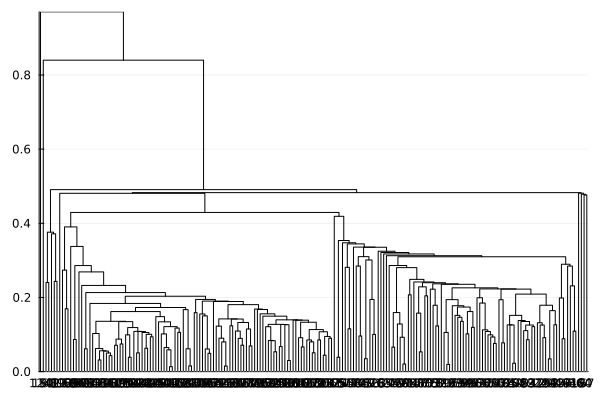

In [46]:
plot(hc)